# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [1]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

## Подготовка данных

In [2]:
#Сохраним данные в переменных
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
#Создадим список из переменных и посмотрим информацию о каждом датасете
data_list = [data_train, data_test, data_full]
for data in data_list:
    display(data.head())
    display(data.info())
    display(data.describe())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 14149 entries, 0 to 14148

Data columns (total 87 columns):

 #   Column                                              Non-Null Count  Dtype  

---  ------                                              --------------  -----  

 0   date                                                14149 non-null  object 

 1   final.output.concentrate_ag                         14148 non-null  float64

 2   final.output.concentrate_pb                         14148 non-null  float64

 3   final.output.concentrate_sol                        13938 non-null  float64

 4   final.output.concentrate_au                         14149 non-null  float64

 5   final.output.recovery                               14149 non-null  float64

 6   final.output.tail_ag                                14149 non-null  float64

 7   final.output.tail_pb                                14049 non-null  float64

 8   final.output.tail_sol                               14144 non-n

None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 5290 entries, 0 to 5289

Data columns (total 53 columns):

 #   Column                                      Non-Null Count  Dtype  

---  ------                                      --------------  -----  

 0   date                                        5290 non-null   object 

 1   primary_cleaner.input.sulfate               5286 non-null   float64

 2   primary_cleaner.input.depressant            5285 non-null   float64

 3   primary_cleaner.input.feed_size             5290 non-null   float64

 4   primary_cleaner.input.xanthate              5286 non-null   float64

 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64

 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64

 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64

 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64

 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64

 1

None

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 19439 entries, 0 to 19438

Data columns (total 87 columns):

 #   Column                                              Non-Null Count  Dtype  

---  ------                                              --------------  -----  

 0   date                                                19439 non-null  object 

 1   final.output.concentrate_ag                         19438 non-null  float64

 2   final.output.concentrate_pb                         19438 non-null  float64

 3   final.output.concentrate_sol                        19228 non-null  float64

 4   final.output.concentrate_au                         19439 non-null  float64

 5   final.output.recovery                               19439 non-null  float64

 6   final.output.tail_ag                                19438 non-null  float64

 7   final.output.tail_pb                                19338 non-null  float64

 8   final.output.tail_sol                               19433 non-n

None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [4]:
#Проверим данные на дубликаты
for data in data_list:
    print('Количество дубликатов в датасете:', data.duplicated().sum())

Количество дубликатов в датасете: 0

Количество дубликатов в датасете: 0

Количество дубликатов в датасете: 0


Во всех выборках присутствуют пропуски. Дуликатов нет. Предобработка будет позже.

Проверим правильность расчёта эффективности обогащения. Вычислим её на обучающей выборке для признака rougher.output.recover  
**Формула расчёта:**  
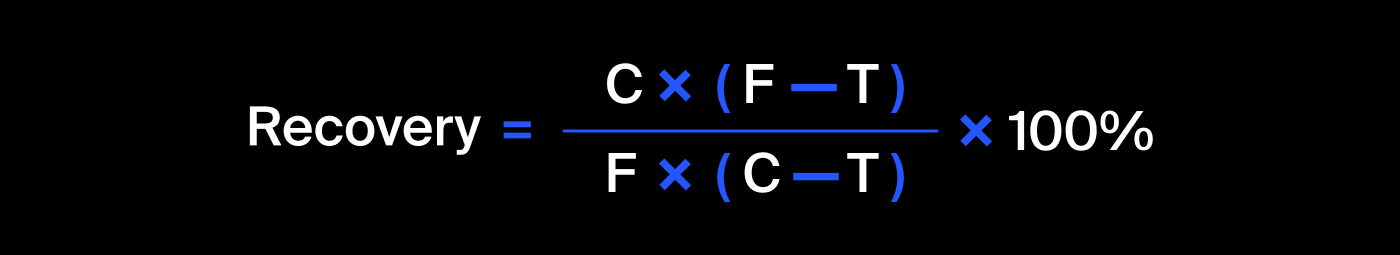  
**В которой:**  
C — доля золота в концентрате после флотации/очистки;  
F — доля золота в сырье до флотации/очистки;  
T — доля золота в отвальных хвостах после флотации/очистки.

In [5]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
#Сохраним расчёты в новом столбце и вычислим среднее
data_train['count_recovery'] = ((C*(F-T))/(F*(C-T)))*100
data_train['count_recovery'].mean()

82.70450164550293

In [6]:
#Посмотрим среднее признака rougher.output.recover
data_train['rougher.output.recovery'].mean()

82.70450164550293

Седние показатели равны, значит эффективность рассчитана правильно.

In [7]:
#Найдём MAE между нашими расчётами и значением признака
print(mean_absolute_error(data_train['count_recovery'], data_train['rougher.output.recovery']))

9.73512347450521e-15


In [8]:
#Удалим созданный столбец с расчётами
data_train.drop('count_recovery', axis=1, inplace=True)

МАЕ очень мало, поэтому правильность расчёта эффективности подтверждена.

In [9]:
#Добавим в тестовую выборку целевые признаки final.output.recovery и rougher.output.recovery
data_test = data_test.merge(data_full[['rougher.output.recovery', 'final.output.recovery']],
                                              how='left', left_index=True, right_index=True)

In [10]:
#Посмотрим признаки, которые недоступны в тестовой выборке
train_set=set(data_train.columns.to_list())
test_set=set(data_test.columns.to_list())
tt_set=train_set-test_set
tt_set


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'secondary_cleane

Обнаруженные признаки относятся к параметрам продукта и расчётным характеристикам. В тестовой выборке отсутствуют целевые признаки **final.output.recovery** и **rougher.output.recovery**. В тренировочной выборке присутствуют признаки, которые мы получаем в процессе флотации. Т.к. мы хотим получить предсказание до флотации, все признаки, которых нет в тестовой выборке, нам нужно удалить из тренировочной выборки, чтобы обучить модель. Целевые признаки нужно добавить в тестовую выборку.

In [11]:
#Проведём предобработку
#Посмотрим, есть ли нулевые значения у целевых признаков в тестовой и обучающей выборках
print(data_test[data_test['rougher.output.recovery'] == 0]['rougher.output.recovery'].count())
print(data_test[data_test['final.output.recovery'] == 0]['final.output.recovery'].count())
print(data_train[data_train['rougher.output.recovery'] == 0]['rougher.output.recovery'].count())
print(data_train[data_train['final.output.recovery'] == 0]['final.output.recovery'].count())

96

23

297

58


In [12]:
#Удалим строки с нулевыми значениями целевых признаков, т.к. для обучения модели они не будут полезны, а наоборот, 
#создадут помехи
data_train = data_train.drop(data_train[data_train['rougher.output.recovery'] == 0].index)
data_train = data_train.drop(data_train[data_train['final.output.recovery'] == 0].index)
data_test = data_test.drop(data_test[data_test['rougher.output.recovery'] == 0].index)
data_test = data_test.drop(data_test[data_test['final.output.recovery'] == 0].index)

In [13]:
#Заменим пропуски в данных методом ffill
data_list = [data_train, data_test, data_full]
for data in data_list:
    data.fillna(method= 'ffill', inplace=True)

In [14]:
#Проверим, остались ли пропуски в данных
for data in data_list:
    print(data.isna().sum())

date                                          0

final.output.concentrate_ag                   0

final.output.concentrate_pb                   0

final.output.concentrate_sol                  0

final.output.concentrate_au                   0

                                             ..

secondary_cleaner.state.floatbank5_a_level    0

secondary_cleaner.state.floatbank5_b_air      0

secondary_cleaner.state.floatbank5_b_level    0

secondary_cleaner.state.floatbank6_a_air      0

secondary_cleaner.state.floatbank6_a_level    0

Length: 87, dtype: int64

date                                          0

primary_cleaner.input.sulfate                 0

primary_cleaner.input.depressant              0

primary_cleaner.input.feed_size               0

primary_cleaner.input.xanthate                0

primary_cleaner.state.floatbank8_a_air        0

primary_cleaner.state.floatbank8_a_level      0

primary_cleaner.state.floatbank8_b_air        0

primary_cleaner.state.floatbank8_b_level   

**Вывод**  
Данные подготовлены:
* Изучена общая иформация о данных
* Проверена правильность расчёта эффективности обогащения
* Проведена предобработка данных - удалены ненужные признаки из тренировочной выборки, добавлены целевые признаки в тестовую выборку, пропуски в данных заменены подходящими значениями, удалён признак **date** за ненадобностью
* Строки с нулевыми значениями целевых признаков удалены

## Анализ данных

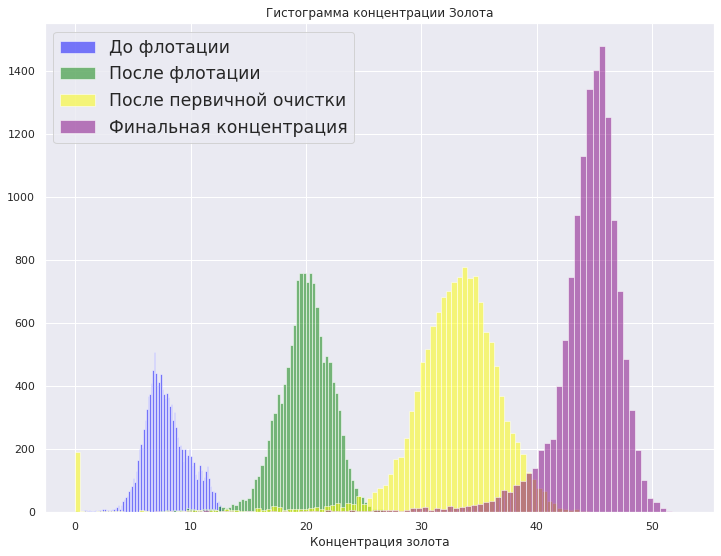

In [15]:
#Построим гистограмму концентрации золота
plt.figure(figsize=[12,9])

plt.hist(data_train['rougher.input.feed_au'], bins=100, label = 'До флотации', alpha=0.5, color='blue')
plt.hist(data_train['rougher.output.concentrate_au'], bins=100, label = 'После флотации', alpha=0.5,
                                                                                       color='green')
plt.hist(data_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'После первичной очистки',
                                                                                alpha=0.5, color='yellow')
plt.hist(data_train['final.output.concentrate_au'], bins=100, label = 'Финальная концентрация', alpha=0.5, color='purple')



plt.xlabel('Концентрация золота')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма концентрации Золота')
plt.show()

С каждым этапом концентрация золота повышается

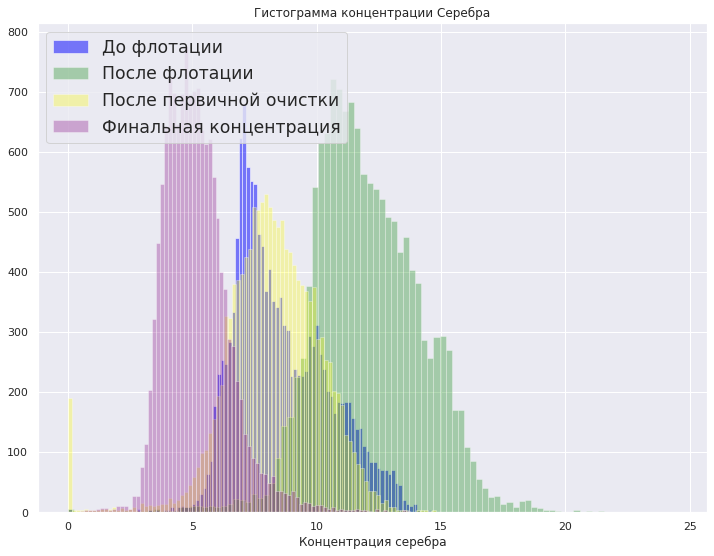

In [16]:
#Построим гистограмму концентрации серебра
plt.figure(figsize=[12,9])

plt.hist(data_train['rougher.input.feed_ag'], bins=100, label = 'До флотации', alpha=0.5, color='blue')
plt.hist(data_train['rougher.output.concentrate_ag'], bins=100, label = 'После флотации', alpha=0.3,
                                                                                       color='green')
plt.hist(data_train['primary_cleaner.output.concentrate_ag'], bins=100, label = 'После первичной очистки',
                                                                                alpha=0.3, color='yellow')
plt.hist(data_train['final.output.concentrate_ag'], bins=100, label = 'Финальная концентрация', alpha=0.3, color='purple')



plt.xlabel('Концентрация серебра')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма концентрации Серебра')
plt.show()

С каждым этапом концентрация серебра понижается, т.к. основной целью очистки является получение золота и избавление от прочих металлов

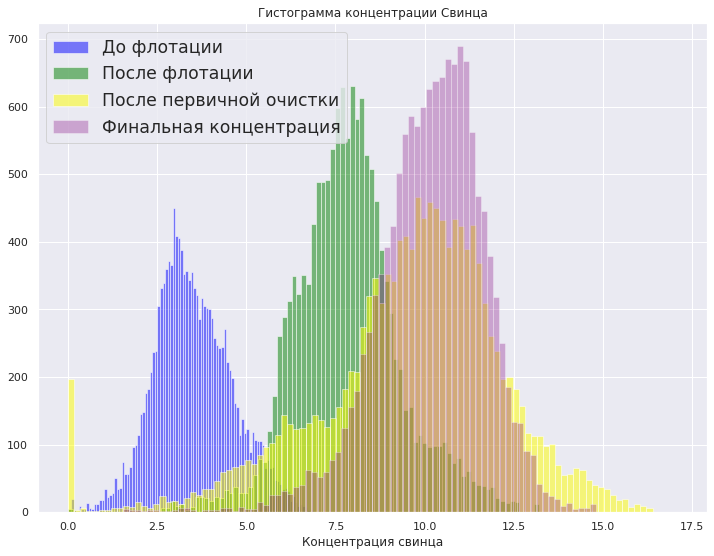

In [17]:
#Построим гистограмму концентрации свинца
plt.figure(figsize=[12,9])

plt.hist(data_train['rougher.input.feed_pb'], bins=100, label = 'До флотации', alpha=0.5, color='blue')
plt.hist(data_train['rougher.output.concentrate_pb'], bins=100, label = 'После флотации', alpha=0.5,
                                                                                       color='green')
plt.hist(data_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'После первичной очистки',
                                                                                alpha=0.5, color='yellow')
plt.hist(data_train['final.output.concentrate_pb'], bins=100, label = 'Финальная концентрация', alpha=0.3, color='purple')



plt.xlabel('Концентрация свинца')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма концентрации Свинца')
plt.show()

Концентрация свинца повышается после флотации и первичной очистки, потом не меняется

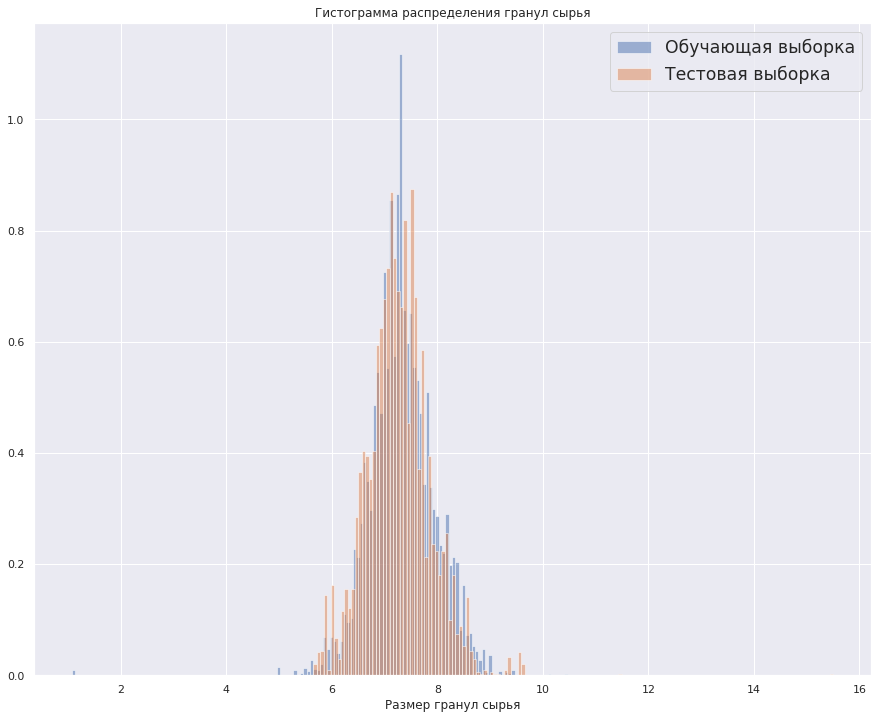

In [18]:
#Сравним распределения размеров гранул сырья на обучающей и тестовой выборках
#Построим гистограмму

plt.figure(figsize=[15,12])

plt.hist(data_train['primary_cleaner.input.feed_size'], bins=150, density=True, label = 'Обучающая выборка', alpha=0.5)
plt.hist(data_test['primary_cleaner.input.feed_size'], bins=150, density=True, label = 'Тестовая выборка', alpha=0.5)

plt.xlabel('Размер гранул сырья')

plt.legend(loc='upper right', fontsize='x-large')

plt.title('Гистограмма распределения гранул сырья')
plt.show()

Распределение гранул не сильно отличается, модель от этого не пострадает

In [24]:
#Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах
#Создадим переменные с нужными нам признаками

rougher_int_conc = (data_train['rougher.input.feed_au'] + 
                                        data_train['rougher.input.feed_ag'] + 
                                        data_train['rougher.input.feed_pb'])
rougher_out_conc = (data_train['rougher.output.concentrate_au'] + 
                                                data_train['rougher.output.concentrate_ag'] + 
                                                data_train['rougher.output.concentrate_pb'])
final_conc = (data_train['final.output.concentrate_au'] + 
                                      data_train['final.output.concentrate_ag'] + 
                                      data_train['final.output.concentrate_pb'])

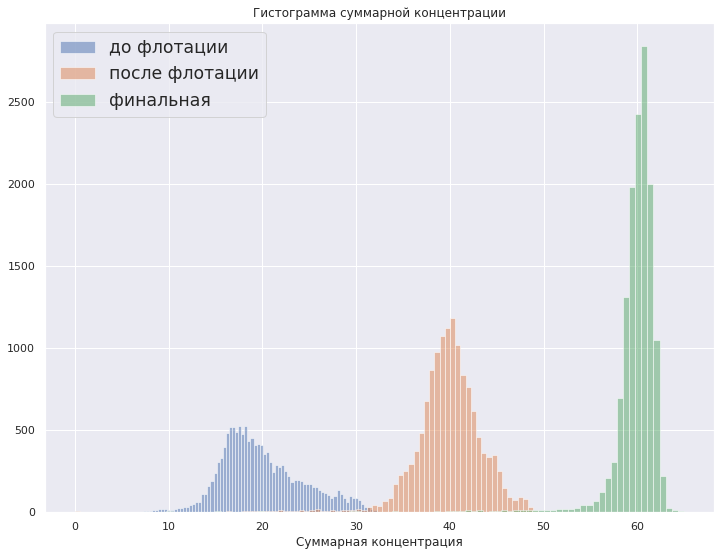

In [25]:
#Построим гистограмму
plt.figure(figsize=[12,9])

plt.hist(rougher_int_conc, bins=100, label = 'до флотации', alpha=0.5)
plt.hist(rougher_out_conc, bins=100, label = 'после флотации', alpha=0.5)
plt.hist(final_conc, bins=100, label = 'финальная', alpha=0.5)

plt.xlabel('Суммарная концентрация')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма суммарной концентрации')
plt.show()

In [23]:
#На гистограмме мы видим, что есть нулевые значения концентрации признака "после первичной очистки". 
#Возможно, они стали результатом сбоя технологического процесса и являются аномалиями. 
#Посмотрим поближе.

На гистограмме видно, что с каждой стадией суммарная концентрация увеличивается

Построим гистограмму для поиска аномалий в стадиях "после флотации", "после первичной очистки" и "финальная"

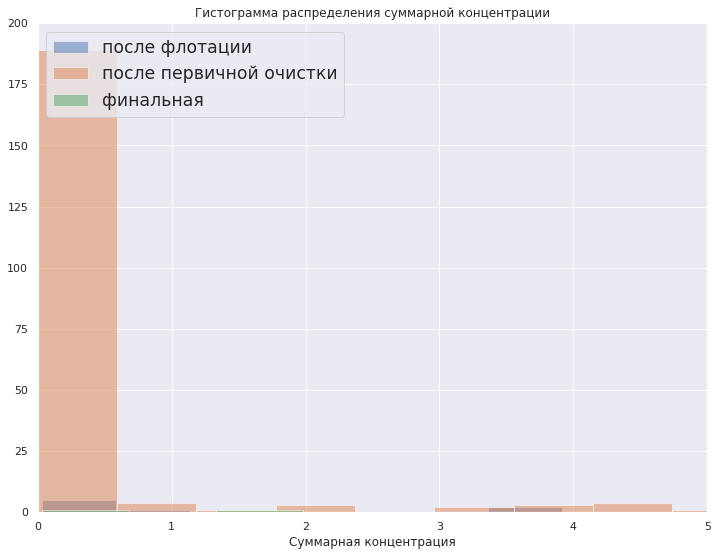

In [27]:
plt.figure(figsize=[12,9])

plt.hist(rougher_conc, bins=100, label = 'после флотации', alpha=0.5)
plt.hist(primary_conc, bins=100, label = 'после первичной очистки', alpha=0.5)
plt.hist(final_conc, bins=100, label = 'финальная', alpha=0.5)

plt.xlabel('Суммарная концентрация')
plt.xlim(0, 5)
plt.ylim(0, 200)

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма распределения суммарной концентрации')
plt.show()

Видим, что есть нулевые значения концентрации у всех троих признаков. Удалим все нулевые значения.

In [28]:
#Посмотрим размер тренировочной выборки
data_train.shape

(13795, 87)

In [29]:
#Удалим нулевые значения
data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_au'] == 0].index)
data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_ag'] == 0].index)
data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_pb'] == 0].index)
data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_au'] == 0].index)
data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_ag'] == 0].index)
data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_pb'] == 0].index)
data_train = data_train.drop(data_train[data_train['final.output.concentrate_au'] == 0].index)
data_train = data_train.drop(data_train[data_train['final.output.concentrate_ag'] == 0].index)
data_train = data_train.drop(data_train[data_train['final.output.concentrate_pb'] == 0].index)

In [30]:
#Посмотрим размер тренировочной выборки
data_train.shape

(13720, 87)

In [ ]:
#Удалим ненужные признаки из тренировочной выборки
data_train = data_train.drop(list(tt_set), axis=1)

In [ ]:
#Проверим удаление признаков
data_train.info()

In [ ]:
#Удалим столбец с датой из датасетов, т.к. он не понадобится для предсказания
data_list = [data_train, data_test, data_full]

for data in data_list:
    data.drop('date', axis=1, inplace=True)

**Вывод:**  
* Исследованы изменения концентрации золота, серебра и свинца. Концентрация золота увеличивается с каждым этапом, концентрация серебра уменьшается, концентрация свинца увеличивается после первичной очистки и больше не меняется.
* Проведено сравнение распределения размеров гранул сырья в обучающей и тестовой выборках. Различия незначительны, на обучение модели это не повлияет.
* Исследована суммарная концентрация всех веществ на разных стадиях. Обнаружены аномалии, которые мы удалили.

## Модель

In [ ]:
#Напишем функцию вычисления итоговой sMAPE
def smape(target, predict):
    return 1/len(target) * np.sum(2*np.abs(target - predict) / (np.abs(target) + np.abs(predict))*100)
def smape_final(rougher, final):
    return 0.25*rougher + 0.75*final

In [ ]:
#Разделим обучающую выборку на признаки и целевой признак
features_rougher_train = data_train.drop(['rougher.output.recovery'], axis=1).filter(regex='^rougher',axis=1)
target_rougher_train = data_train['rougher.output.recovery']
print(features_rougher_train.shape)
print(target_rougher_train.shape)

features_final_train = data_train.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
target_final_train = data_train['final.output.recovery']
print(features_final_train.shape)
print(target_final_train.shape)

In [ ]:
#Разделим тестовую выборку на признаки и целевой признак
features_rougher_test = data_test.filter(regex='^rougher',axis=1).drop(['rougher.output.recovery'], axis=1)
target_rougher_test = data_test['rougher.output.recovery']
print(features_rougher_test.shape)
print(target_rougher_test.shape)

features_final_test = data_test.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
target_final_test = data_test['final.output.recovery']
print(features_final_test.shape)
print(target_final_test.shape)

In [ ]:
#Обучим модель решающего дерева
for depth in range(1, 13, 2):
    model_tree = DecisionTreeRegressor(random_state=12345, max_depth = depth)
    scorer = make_scorer(smape, greater_is_better=False)
    tree_rougher = -1 * cross_val_score(model_tree, features_rougher_train, target_rougher_train, scoring=scorer, cv=5)
    tree_final = -1 * cross_val_score(model_tree, features_final_train, target_final_train, scoring=scorer, cv=5)
    print('Глубина:',depth)
    print('Итоговая sMAPE:', smape_final(tree_rougher, tree_final).mean())

Лучшее значение итоговой sMAPE у дерева с глубиной **3**

In [ ]:
#Код грузится 40 минут
#Обучим модель случайного леса
best_depth = 0
best_est = 0
best_smape = 10

for est in range(10, 51, 10):   
    for depth in range (1, 13):
        model_forest = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        forest_rougher = -1 * cross_val_score(model_forest, features_rougher_train, target_rougher_train, scoring=scorer, cv=5)
        forest_final = -1 * cross_val_score(model_forest, features_final_train, target_final_train, scoring=scorer, cv=5)
        total_score = smape_final(forest_rougher, forest_final).mean()
        if total_score < best_smape:
            best_smape = total_score
            best_est = est
            best_depth = depth
            
print('Итоговая sMAPE:', total_score)
print('Количество деревьев', best_est)
print('Лучшая глубина', best_depth)

Итоговая sMAPE случайного леса лучше, чем у решающего дерева и равна 8.79

In [ ]:
#Обучим модель линейной регрессии
scaler = StandardScaler()
scaler.fit(features_rougher_train) 
features_rouger_train = scaler.transform(features_rougher_train)

scaler = StandardScaler()
scaler.fit(features_final_train) 
features_final_train = scaler.transform(features_final_train)

model_reg = LinearRegression()
reg_rougher = -1 * cross_val_score(model_reg, features_rougher_train, target_rougher_train, scoring=scorer, cv=5)
reg_final = -1 * cross_val_score(model_reg, features_final_train, target_final_train, scoring=scorer, cv=5)
print('Итоговая sMAPE:', smape_final(reg_rougher, reg_final).mean())

Итоговая sMAPE линейной регрессии хуже, чем у остальных моделей

**Вывод:**  
Лучший показатель sMAPE выявлен у случайного леса с количеством деревьев **20** и глубиной **4**. Его мы и проверим на тестовой выборке.

In [ ]:
#Проверим модель на тестовой выборке
model_rough = RandomForestRegressor(max_depth=4, n_estimators=20, random_state=12345)
model_rough.fit(features_rougher_train, target_rougher_train)
predict_rough = pd.Series(model_rough.predict(features_rougher_test))
smape_rough = smape(target_rougher_test, predict_rough).mean()

model_final = RandomForestRegressor(max_depth=4, n_estimators=20, random_state=12345)
model_final.fit(features_final_train, target_final_train)
predict_final = pd.Series(model_final.predict(features_final_test))
smape_fin = smape(target_final_test, predict_final).mean()

print('Итоговая sMAPE:', smape_final(smape_rough, smape_fin).mean())

In [ ]:
#Проверим адекватность модели
dummy_rough = DummyRegressor(strategy="mean")
dummy_rough.fit(features_rougher_train, target_rougher_train)
predict_rough = dummy_rough.predict(features_rougher_test)
smape_rough_dumm = smape(target_rougher_test, predict_rough).mean()

dummy_final = DummyRegressor(strategy="mean")
dummy_final.fit(features_final_train, target_final_train)
predict_final = dummy_final.predict(features_final_test)
smape_fin_dumm = smape(target_final_test, predict_final).mean()

smape_dummy = smape_final(smape_rough_dumm, smape_fin_dumm)
print('Итоговая sMAPE на dummy:', smape_dummy)

**Вывод:**  
* Проверка на адекватность показала, что модель вменяемая
* На тестовой выборке было получено значение итоговой sMAPE, равное **12.62**. Многовато, конечно, но приемлемо